In [2]:
from pathlib import Path
import torch
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [3]:
path = Path('.')

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
#Get the CIFAR dataset in
data = torchvision.datasets.CIFAR10(root = path/'data', download = True, transform=transform)

Files already downloaded and verified


In [6]:
len(data)

50000

In [7]:
#Sample one image
img, label = data.__getitem__(0)

In [8]:
type(img)

torch.Tensor

In [9]:
def imshow(img):
    img = img/2 + 0.5
    img_np = img.numpy()
    plt.imshow(np.transpose(img_np, (1, 2, 0)))
    plt.show()

In [10]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
img = TF.rotate(img, -90)

In [12]:
#Gotta add an arrow to this numpy matrix
img.numpy()

array([[[ 0.38823533,  0.41176474,  0.6313726 , ..., -0.8039216 ,
         -0.8745098 , -0.5372549 ],
        [ 0.3176471 ,  0.35686278,  0.5764706 , ..., -0.8745098 ,
         -1.        , -0.6627451 ],
        [ 0.4039216 ,  0.45882356,  0.5529412 , ..., -0.6156863 ,
         -0.85882354, -0.60784316],
        ...,
        [ 0.69411767,  0.4431373 ,  0.254902  , ..., -0.0745098 ,
         -0.03529412,  0.23921573],
        [ 0.18431377, -0.23921567, -0.56078434, ..., -0.05882353,
         -0.06666666,  0.19215691],
        [-0.03529412, -0.3490196 , -0.58431375, ..., -0.14509803,
         -0.04313725,  0.16078436]],

       [[ 0.12941182,  0.09019613,  0.33333337, ..., -0.8117647 ,
         -0.84313726, -0.5137255 ],
        [ 0.01176476, -0.03529412,  0.20000005, ..., -0.94509804,
         -1.        , -0.6392157 ],
        [ 0.11372554,  0.12941182,  0.26274514, ..., -0.7882353 ,
         -0.9372549 , -0.62352943],
        ...,
        [ 0.4431373 ,  0.16078436,  0.04313731, ..., -

frog


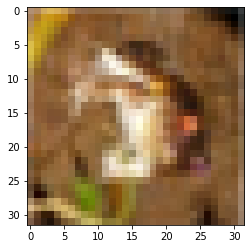

In [13]:
print(classes[label])
imshow(img)

In [14]:
#Sample one image
img, label = data.__getitem__(0)

In [15]:
def add_arrow(img):
    start = 2
    for i in range(start,start+7):
        img[:,i,start+6] = 0
    for i in range(start+5,start+8):
        img[:,start+1,i] = 0
    for i in range(start+4,start+9):
        img[:,start+2,i] = 0
    return img

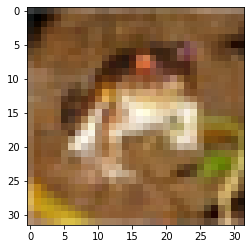

In [16]:
imshow(img)

In [98]:
class arrowedCIFAR(Dataset):
    """Make CIFAR with arrow"""

    def __init__(self):
        transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        self.cifar = torchvision.datasets.CIFAR10(root = path/'data', download = True, transform=transform)
        self.data = []
        self.labels = []
        for i in tqdm(range(len(self.cifar))):
            self.data.append(add_arrow(self.cifar.__getitem__(i)[0])) #Only care about the rotation
            self.labels.append(0)
            for k, angle in enumerate([90, 180, 270]):
                img = add_arrow(self.cifar.__getitem__(i)[0])
                self.data.append(TF.rotate(img, angle))
                self.labels.append(k+1) #Add the rest of labels
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [99]:
arrCIFAR = arrowedCIFAR()

Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:55<00:00, 434.08it/s]


In [110]:
img, label = arrCIFAR.__getitem__(5)

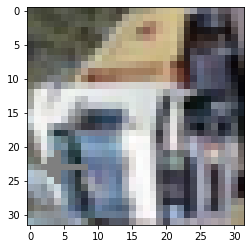

In [111]:
imshow(img)

In [17]:
#Sample one image
img, label = data.__getitem__(0)

In [18]:
img.shape

torch.Size([3, 32, 32])

In [24]:
temp = img[2,:,-1]

In [70]:
img_zeros = np.zeros((3,32,32))

In [71]:
img_zeros[2,:,:] = img[2,:,:]
img_zeros[0,:,:] = img[0,:,:]

In [72]:
move = 1

In [73]:
img_zeros[1,:,move:32] = img[1,:,0:32-move]
img_zeros[1,:,0:move] = img[1,:,32-move:32] #Shifting up

In [74]:
img_zeros.shape

(3, 32, 32)

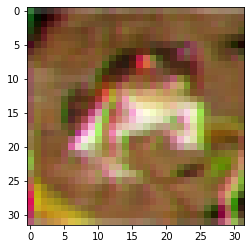

In [75]:
img_zeros = img_zeros/2 + 0.5
plt.imshow(np.transpose(img_zeros, (1, 2, 0)))
plt.show()

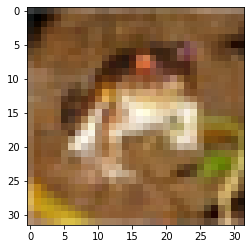

In [76]:
imshow(img)